# Importing Data Set

In [1]:
import pandas as pd                         #To read CSV file
import numpy as np                          #To arrange DATA on x-axis
from matplotlib import pyplot as plt        #To plot the DATA
%matplotlib inline
from matplotlib import style                #To add STYLE to the plot

In [2]:
df = pd.read_csv('weight-height.csv')

In [3]:
df.head()             #to see first 5 rows

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.tail()            #to see last 5 rows

,Gender,Height,Weight
8550,Female,60.483946,110.565497
8551,Female,63.423372,129.921671
8552,Female,65.584057,155.942671
8553,Female,67.429971,151.678405
8554,Female,60.921791,131.253738


In [5]:
df.shape           #to see size of the Data Frame, (rows, columns)

(8555, 3)

In [6]:
df1 = df.copy()
df2 = df.copy()

# Linear Regression_Weight (y)

LABEL ENCODING OF @Gender@

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le = LabelEncoder()          #creating ML OBJECT/MODEL

In [9]:
df1.Gender = le.fit_transform(df1['Gender'])             #Model FIT & TRANSFORM at a time

In [10]:
df1.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [11]:
df1.tail()

,Gender,Height,Weight
8550,0,60.483946,110.565497
8551,0,63.423372,129.921671
8552,0,65.584057,155.942671
8553,0,67.429971,151.678405
8554,0,60.921791,131.253738


SEPARATE "X" & "Y"

In [12]:
x = df1[['Gender', 'Height']]
y = df1[['Weight']]

In [13]:
x.head()

,Gender,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105
3,1,71.730978
4,1,69.881796


In [14]:
y.head()

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


SPLIT DATASET to SEPARATE "Testing" & "Training"

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
xtrain,xtest, ytrain,ytest = train_test_split(x,y, test_size=0.30)    #training data = 70%

In [17]:
xtrain.head()

,Gender,Height
3202,1,64.445098
641,1,71.568734
153,1,69.938475
3407,1,70.187020
6462,0,61.167376


In [18]:
ytrain.head()

,Weight
3202,138.092636
641,206.260458
153,170.175854
3407,182.904304
6462,111.572766


In [19]:
xtest.head()

,Gender,Height
2451,1,70.273822
6769,0,67.426814
222,1,66.805850
8067,0,60.923194
1835,1,68.212508


In [20]:
ytest.head()

,Weight
2451,185.718381
6769,166.937120
222,176.565819
8067,111.367258
1835,192.815178


LINEAR REGRESSION MODEL_TRAINING

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
reg = LinearRegression()         #creating an object/model for Linear Regression

In [23]:
reg.fit(xtrain, ytrain)          #training ML model

LinearRegression()

In [24]:
df1['LR Pred Weight'] = reg.predict(x)    #to create a new column in main dataset of "Predicted results"; After Training
df1

,Gender,Height,Weight,LR Pred Weight
0,1,73.847017,241.893563,215.753907
1,1,68.781904,162.310473,185.671974
2,1,74.110105,212.740856,217.316401
3,1,71.730978,220.042470,203.186659
4,1,69.881796,206.349801,192.204281
...,...,...,...,...
8550,0,60.483946,110.565497,116.509790
8551,0,63.423372,129.921671,133.967172
8552,0,65.584057,155.942671,146.799578
8553,0,67.429971,151.678405,157.762548


PREDICTED VALUE of "TESTING DATASET"_ytest (predicted)

In [25]:
pred = reg.predict(xtest)       #to get corresponding "ytest" value; after Linear Regression

In [26]:
pred

array([[194.53253921],
       [157.74379378],
       [173.93609998],
       ...,
       [204.5267896 ],
       [107.62018781],
       [222.8296524 ]])

EVALUATION MODEL_Accuracy

In [27]:
Accuracy1 = reg.score(xtest, ytest)                #'xtest' for Prediction and 'ytest=true value' for Comparison
Accuracy1

0.8939117174383483

EVALUATION MODEL_MSE

In [28]:
from sklearn.metrics import mean_squared_error

In [29]:
MSE1 = mean_squared_error(ytest, pred)     #"ytest = actual y" , "pred = predicted y"

In [30]:
MSE1

108.6639670005216

EVALUATION MODEL_MAE

In [31]:
from sklearn.metrics import mean_absolute_error

In [32]:
MAE1 = mean_absolute_error(ytest, pred)    #"ytest = actual y" , "pred = predicted y"

In [33]:
MAE1

8.123686904946457

# KNN Regression_Weight (y)

KNN REGRESSION MODEL_TRAINING

In [34]:
#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

from sklearn.neighbors import KNeighborsRegressor

In [35]:
neigh = KNeighborsRegressor()           #to create ML model; taking default neighbors=5
neigh.fit(xtrain, ytrain)               #training & fitting ML model

KNeighborsRegressor()

In [36]:
df1['KNN Pred Weight'] = neigh.predict(x)    #to create a new column in main dataset of "Predicted results"; After Training
df1

,Gender,Height,Weight,LR Pred Weight,KNN Pred Weight
0,1,73.847017,241.893563,215.753907,215.753136
1,1,68.781904,162.310473,185.671974,181.926294
2,1,74.110105,212.740856,217.316401,220.778807
3,1,71.730978,220.042470,203.186659,203.559385
4,1,69.881796,206.349801,192.204281,191.390647
...,...,...,...,...,...
8550,0,60.483946,110.565497,116.509790,114.899508
8551,0,63.423372,129.921671,133.967172,133.749804
8552,0,65.584057,155.942671,146.799578,151.640581
8553,0,67.429971,151.678405,157.762548,155.233032


PREDICTED VALUE of "TESTING DATASET"_ytest (predicted)

In [37]:
pred = neigh.predict(xtest)       #to get corresponding "ytest" value; after KNN Regression
pred

array([[198.69513746],
       [155.23303196],
       [173.8029303 ],
       ...,
       [210.37885532],
       [107.09412496],
       [220.69697718]])

EVALUATION MODEL_Accuracy

In [38]:
Accuracy2 = neigh.score(xtest, ytest)                  #'xtest' for Prediction and 'ytest=true value' for Comparison
Accuracy2

0.8687219583651908

EVALUATION MODEL_MSE

In [39]:
MSE2 = mean_squared_error(ytest, pred)     #"ytest = actual y" , "pred = predicted y"
MSE2

134.46530040495279

EVALUATION MODEL_MAE

In [40]:
MAE2 = mean_absolute_error(ytest, pred)    #"ytest = actual y" , "pred = predicted y"
MAE2

9.110796580036618

# Comparison between LR & KNN_Regression

In [41]:
parameter = ['Accuracy', 'MSE', 'MAE']
LR = [Accuracy1, MSE1, MAE1]
KNN = [Accuracy2, MSE2, MAE2]

In [42]:
xpos = np.arange(len(parameter))
xpos

array([0, 1, 2])

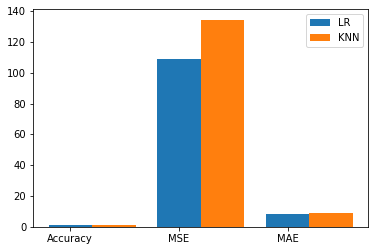

In [43]:
plt.bar(xpos,LR, width=0.4, label='LR')
plt.bar(xpos+0.4,KNN, width=0.4, label='KNN')
plt.xticks(xpos, parameter)
plt.legend()

# KNN Classification_Gender (y)

LABEL ENCODING OF @Gender@

In [44]:
df2.Gender = le.fit_transform(df2['Gender'])             #Model FIT & TRANSFORM at a time

In [45]:
df2.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


SEPARATE "X" & "Y"

In [46]:
x1 = df2[['Height', 'Weight']]
y1 = df2[['Gender']]

In [47]:
x1.tail()

,Height,Weight
8550,60.483946,110.565497
8551,63.423372,129.921671
8552,65.584057,155.942671
8553,67.429971,151.678405
8554,60.921791,131.253738


In [48]:
y1.tail()

,Gender
8550,0
8551,0
8552,0
8553,0
8554,0


SPLIT DATASET to SEPARATE "Testing" & "Training"

In [49]:
x1train,x1test, y1train,y1test = train_test_split(x1,y1, test_size=0.30)    #training data = 70%

In [50]:
x1train.head()

,Height,Weight
5115,62.996579,131.004285
6195,66.066489,158.503983
4450,70.781643,209.511913
914,66.795793,186.993899
6606,63.041982,119.937293


In [51]:
y1train.head()

,Gender
5115,0
6195,0
4450,1
914,1
6606,0


KNN CLASSIFICATION MODEL_TRAINING

In [52]:
#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

from sklearn.neighbors import KNeighborsClassifier

In [53]:
neigh1 = KNeighborsClassifier()        #to create ML model; taking default neighbors=5
neigh1.fit(x1train, y1train)           #training & fitting ML model

C:\Users\Sajib Khan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [54]:
df2['KNN Predicted Gender'] = neigh1.predict(x1)    #to create a new column in main dataset of "Predicted results"; After Training
df2

,Gender,Height,Weight,KNN Predicted Gender
0,1,73.847017,241.893563,1
1,1,68.781904,162.310473,0
2,1,74.110105,212.740856,1
3,1,71.730978,220.042470,1
4,1,69.881796,206.349801,1
...,...,...,...,...
8550,0,60.483946,110.565497,0
8551,0,63.423372,129.921671,0
8552,0,65.584057,155.942671,0
8553,0,67.429971,151.678405,0


PREDICTED VALUE of "TESTING DATASET"_ytest (predicted)

In [55]:
pred1 = neigh1.predict(x1test)       #to get corresponding "ytest" value; after KNN Classification
pred1

array([0, 1, 1, ..., 0, 1, 1])

EVALUATION MODEL_Classification Report

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y1test, pred1))            # "y1test = actual output" & "pred1 = predicted output"

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      1046
           1       0.93      0.93      0.93      1521

    accuracy                           0.91      2567
   macro avg       0.91      0.91      0.91      2567
weighted avg       0.91      0.91      0.91      2567



EVALUATION MODEL_Confusion Matrix

In [57]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y1test, pred1)

array([[ 938,  108],
       [ 114, 1407]], dtype=int64)

EVALUATION MODEL_Accuracy

In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(y1test, pred1)

0.913517724970783

EVALUATION MODEL_ROC

C:\Users\Sajib Khan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


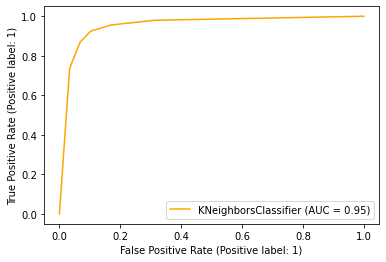

In [59]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(neigh1, x1test, y1test, color='orange')     # (clf=algorithm), (xtest=input feature values for prediction), (ytest=actual value for checking with predicted results)

EVALUATION MODEL_AUC

C:\Users\Sajib Khan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


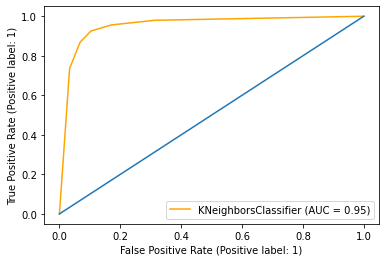

In [60]:
plot_roc_curve(neigh1, x1test, y1test, color='orange')
plt.plot([0,1], [0,1])